## Задача 8. Numpy

Импорт библиотек

In [1]:
import numpy as np

# Получить датасет Iris

Данные датасета получены по ссылке

In [34]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = np.genfromtxt(url, delimiter=",", dtype=str) # read the data by columns as str
print(iris[:5])

features = iris[:, :4].astype(float) # select the first 4 columns as float
iris_names = iris[:, 4]

# print matrix sizes and memory space
print(f"features size: {features.shape}")
print(f"iris_names size: {iris_names.shape}")
print(f"size in memory for features: {features.nbytes / 1024:.2f} Kb")
print(f"size in memory for iris_names: {iris_names.nbytes / 1024:.2f} Kb")

[['5.1' '3.5' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.0' '1.4' '0.2' 'Iris-setosa']
 ['4.7' '3.2' '1.3' '0.2' 'Iris-setosa']
 ['4.6' '3.1' '1.5' '0.2' 'Iris-setosa']
 ['5.0' '3.6' '1.4' '0.2' 'Iris-setosa']]
features size: (150, 4)
iris_names size: (150,)
size in memory for features: 4.69 Kb
size in memory for iris_names: 8.79 Kb


# Нормализация данных

In [35]:
features_min = features.min(axis=0)  # min value
features_max = features.max(axis=0)  # max value
features_normalized = (features - features_min) / (features_max - features_min)
print('features_normalized: ', features_normalized[:5], sep='\n')

features_normalized: 
[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


# Добавить категориальный признак

Возьмем первый столбец для признака

In [36]:
first_features = features_normalized[:, 0]

categories = np.where(first_features < 0.25, 1,
                      np.where(first_features > 0.75, 3, 2))

features_normalized[:, 0] = categories
features_normalized[:10]

array([[1.        , 0.625     , 0.06779661, 0.04166667],
       [1.        , 0.41666667, 0.06779661, 0.04166667],
       [1.        , 0.5       , 0.05084746, 0.04166667],
       [1.        , 0.45833333, 0.08474576, 0.04166667],
       [1.        , 0.66666667, 0.06779661, 0.04166667],
       [2.        , 0.79166667, 0.11864407, 0.125     ],
       [1.        , 0.58333333, 0.06779661, 0.08333333],
       [1.        , 0.58333333, 0.08474576, 0.04166667],
       [1.        , 0.375     , 0.06779661, 0.04166667],
       [1.        , 0.45833333, 0.08474576, 0.        ]])

# Разделение данных на тренировочную и тестовую выборки

In [40]:
np.random.seed(42)
indices = np.arange(features_normalized.shape[0])
np.random.shuffle(indices)

# split into training and test data
split_index = int(0.8 * len(indices))
train_indices = indices[:split_index]
test_indices = indices[split_index:]

# split normalized data
train_features_norm = features_normalized[train_indices]
test_features_norm = features_normalized[test_indices]
train_names = iris_names[train_indices]
test_names = iris_names[test_indices]

print(f'trainig data length: {train_names.shape}')
print(f'test data length: {test_names.shape}')

trainig data length: (120,)
test data length: (30,)


# Классификация

Был выбран метод классификации случайный лес

In [41]:
from sklearn.ensemble import RandomForestClassifier

# create and traning model
clf = RandomForestClassifier()
clf_norm = clf.fit(train_features_norm, train_names)

Оценка результата

In [42]:
from sklearn.metrics import accuracy_score, f1_score

# predict results
names_predict = clf_norm.predict(test_features_norm)

# check metrics
print(f"Accuracy: {accuracy_score(test_names, names_predict)}")
print(f"F1-Score: {f1_score(test_names, names_predict, average='weighted')}")

Accuracy: 0.9666666666666667
F1-Score: 0.9666666666666667


Можно сделать вывод, что модель случайного леса хорошо справляется с задачей классификации. Высокие значения метрик свидетельствуют о точности модели.

# Эксперименты

1. Использование ненормализованных данных

In [43]:
# split features data
train_features = features[train_indices]
test_features = features[test_indices]

# model training
clf = clf.fit(train_features, train_names)

test_names_predict = clf.predict(test_features)

print(f"Accuracy: {accuracy_score(test_names, test_names_predict)}")
print(f"F1-Score: {f1_score(test_names, test_names_predict, average='weighted')}")

Accuracy: 0.9666666666666667
F1-Score: 0.9666666666666667


Можно сделать вывод о том что при работе с ненормализованными данными модель сохраняет высокую точность.

2. Эксперименты с параметрами модели

Для экспериментов рассмтрел 6 pipeline'ов.


*   1, 2 проверяют влияние модели `StandardScaler` на модель
*   2, 3 проверяют влияние `n_estimators` на модель
*   3, 4 проверяют влияние `regressor` и `classifiter` на модель
*   4, 5 проверяют влияние `max_depth` на модель   
*   5, 6 проверяют влияние нормализованных данных при наличии других параметров


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# create pipelines
pipeline1 = Pipeline([
    ('scaler', StandardScaler()),
    ('classifiter', RandomForestClassifier())])

pipeline2 = Pipeline([
    ('classifiter', RandomForestClassifier())])


pipeline3 = Pipeline([
    ('classifiter', RandomForestClassifier(n_estimators=10))])

pipeline4 = Pipeline([
    ('regressor', RandomForestClassifier(n_estimators=10))])

pipeline5 = Pipeline([
    ('regressor', RandomForestClassifier(n_estimators=10, max_depth=1))])

pipeline6 = Pipeline([
    ('regressor', RandomForestClassifier(n_estimators=10, max_depth=1))])


# models training
pipeline1.fit(train_features, train_names)
pipeline2.fit(train_features, train_names)
pipeline3.fit(train_features, train_names)
pipeline4.fit(train_features, train_names)
pipeline5.fit(train_features, train_names)
pipeline6.fit(train_features_norm, train_names)


# predict results
names_predict1 = pipeline1.predict(test_features)
names_predict2 = pipeline2.predict(test_features)
names_predict3 = pipeline3.predict(test_features)
names_predict4 = pipeline4.predict(test_features)
names_predict5 = pipeline5.predict(test_features)
names_predict6 = pipeline6.predict(test_features_norm)


list_names_predict = [
    names_predict1,
    names_predict2,
    names_predict3,
    names_predict4,
    names_predict5,
    names_predict6,
]

# output of metrics
for id, pipeline_predict in enumerate(list_names_predict):
  print(f'pipeline {id+1}')
  print(f"Accuracy: {accuracy_score(test_names, pipeline_predict)}")
  print(f"F1-Score: {f1_score(test_names, pipeline_predict, average='weighted')}")
  print()

pipeline 1
Accuracy: 0.9666666666666667
F1-Score: 0.9666666666666667

pipeline 2
Accuracy: 0.9666666666666667
F1-Score: 0.9666666666666667

pipeline 3
Accuracy: 0.9666666666666667
F1-Score: 0.9666666666666667

pipeline 4
Accuracy: 0.9333333333333333
F1-Score: 0.9330808080808081

pipeline 5
Accuracy: 0.6333333333333333
F1-Score: 0.5564102564102564

pipeline 6
Accuracy: 0.6
F1-Score: 0.4708333333333333



Выводы сделанные на основе нескольких запусков:
1. Наличие `StandardScaler` оказывает незначительно влияние (+-3.4% на каждом запуске)
2. `n_estimators` оказывает незначительно влияние (+-3.4% на каждом запуске)
3. `regressor` и `classifiter` оказывает незначительно влияние (+-3.4% на каждом запуске)
4. `max_depth` может значительно влиять на результат обучения. При `max_depth=1` значение метрик падает на 30%.
5. Результат обуения на нормализованных отличается в среднем на +-7% от обучения на ненормализованных при `max_depth=1`.

Итог:

Для датасета Iris классифицированного методом случайного леса наиболее значимым является параметр `max_depth`.

# Визуализация

Сделал две функции для вывода `PCA` и `t-SNE`

In [45]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def plot_pca(features_pca, names, ax, title, pca):
    features_pca = pca.fit_transform(features)
    scatter = ax.scatter(features_pca[:, 0], features_pca[:, 1], c=names, cmap='viridis')
    ax.legend(*scatter.legend_elements(), title="iris_name")
    ax.set_title(f'PCA - {title}')

def plot_tsne(features, names, ax, title, tsne):
    features_tsne = tsne.fit_transform(features)
    scatter = ax.scatter(features_tsne[:, 0], features_tsne[:, 1], c=names, cmap='viridis')
    ax.legend(*scatter.legend_elements(), title="iris_name")
    ax.set_title(f't-SNE - {title}')

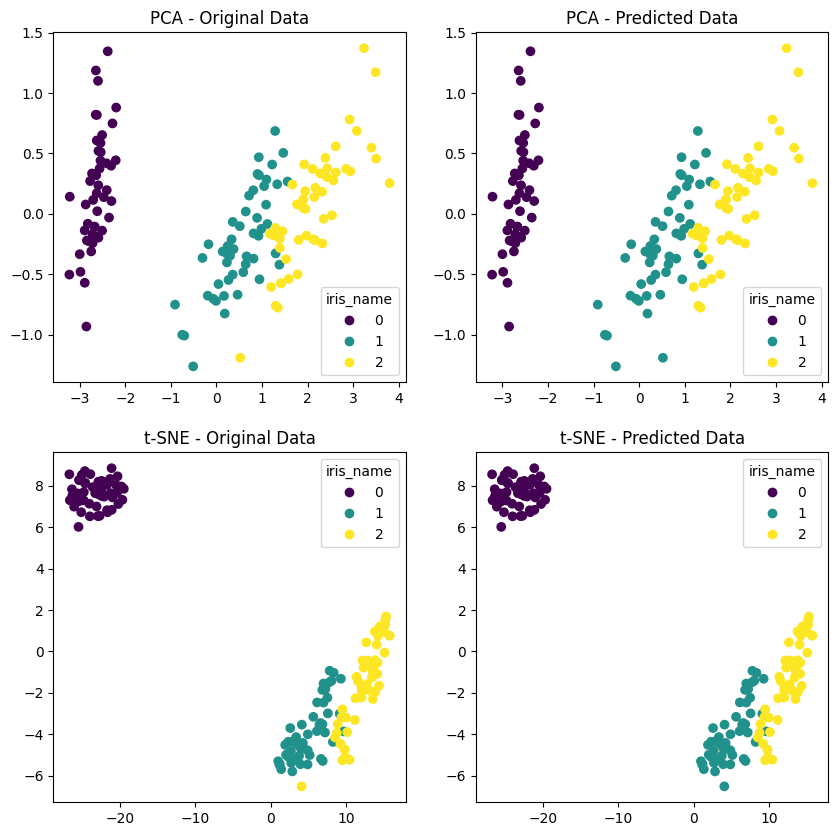

In [46]:
# set plot size
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# create methods linear dimensionality reduction
pca = PCA(n_components=2)
tsne = TSNE(n_components=2, random_state=42)

# get value of all predictions iris_names
predict_names = pipeline2.predict(features)

# encoding iris_names
label_encoder = LabelEncoder()
iris_names_encoded = label_encoder.fit_transform(iris_names)
predict_names_encoded = label_encoder.fit_transform(predict_names)

# drawing plots
plot_pca(features, iris_names_encoded, axes[0, 0], 'Original Data', pca)
plot_tsne(features, iris_names_encoded, axes[1, 0], 'Original Data', tsne)
plot_pca(features, predict_names_encoded, axes[0, 1], 'Predicted Data', pca)
plot_tsne(features, predict_names_encoded, axes[1, 1], 'Predicted Data', tsne)

plt.show()